In [1]:
#importing libraries
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
#importing data
my_data=pd.read_csv("/home/saumitra/Desktop/kaggle/timesData.csv")
pd.set_option("max_columns",None)

In [3]:
my_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
my_data.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [5]:
df=my_data.iloc[:100,:]

**Basic Scatter Plot**

In [6]:
#Modes are of 3 types:lines,markers,text.One combination of mode can be lines+markers
trace1=go.Scatter(x=df['world_rank'],y=df.citations,mode='lines',name='citations',
                  marker=dict(color='rgba(0,17,204,0.87)'),
                text=df.university_name )
trace2=go.Scatter(x=df['world_rank'],y=df.teaching,mode='lines+markers',name='teaching',
                 marker=dict(color='rgba(239, 26, 26, 0.87)'),
                text=df.university_name )
data=[trace1,trace2]
layout=dict(title='Citation and Teaching vs World Rank of Top 100 Universtities',
           xaxis=dict(title='World_rank',ticklen=5,zeroline=False))
fig=dict(data=data,layout=layout)
iplot(fig)

In [7]:
df2014=my_data[my_data.year == 2014].iloc[:100,:]
df2015=my_data[my_data.year == 2015].iloc[:100,:]
df2016=my_data[my_data.year == 2016].iloc[:100,:]
trace1=go.Scatter(x=df2014.world_rank,y=df2014.citations,mode='markers',name='citations 2014',text=df2014.university_name,
       marker=dict(color='rgba(239, 26, 26, 0.87)'))
trace2=go.Scatter(x=df2015.world_rank,y=df2015.citations,mode='lines',name='citations 2015',text=df2015.university_name,
       marker=dict(color='rgba(35, 179, 184, 0.87)'))
trace3=go.Scatter(x=df2016.world_rank,y=df2016.citations,mode='markers',name='citations 2016',text=df2016.university_name,
       marker=dict(color='rgba(188, 108, 178, 0.87)'))
data=[trace1,trace2,trace3]
layout=dict(title='citations va World rank of top 100 countries with 2014,2015 and 2016 years',
            xaxis=dict(title='World Rank',ticklen=5),
            yaxis=dict(title='Citations',ticklen=5))
fig=dict(layout=layout,data=data)
iplot(fig)

**Bargraph**

In [8]:
#We can use various types of barmode:'relative' and 'group' and 'stack' and 'overlay'
df2014=my_data[my_data.year == 2014].iloc[:4,:]
trace1=go.Bar(x=df2014.university_name,y=df2014.citations,name='citations 2014',
              marker=dict(color='rgba(255, 224, 26, 0.87)'),
              text=df2014.country)
trace2=go.Bar(x=df2014.university_name,y=df2014.research,name='research 2014',
              marker=dict(color='rgba(229, 6, 188, 0.8)', line=dict(color='rgb(0,0,0)',width=1.5)),
              text=df2014.country)
data=[trace1,trace2]
layout=dict(title='Citations and Research 2014 comparison',xaxis=dict(title='Country Name'),barmode='relative')
fig=dict(layout=layout,data=data)
iplot(fig)

In [9]:
x=df2014.university_name
trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
}
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
}
data = [trace1, trace2]
layout = {
  'xaxis': {'title': 'Top 4 universities'},
  'barmode': 'group',
  'title': 'citations and teaching of top 4 universities in 2014'
};
fig = {'data' : data , 'layout' : layout}
iplot(fig)

**PieChart**

*Values* as usual provide data to plot here. *domain* here provides the axis ratio till which the graph is to be made. *textfont* set the font of text of percentage written inside the pie. *hole* is the width of inner hole . *annotations* provide properties of different graphs...we can append if more than on pieplot were present in the graph by using.append in the list of annotations.

In [10]:
df2016=my_data[my_data.year == 2016].iloc[:7,:]
pie1=df2016.num_students
pie1_list=[float(each.replace(',','.')) for each in df2016.num_students]
trace1=go.Pie(values=pie1_list,labels=df2016.university_name,
             name='Number of students Rates',domain=dict(x=[0,0.5]),
              hoverinfo='label+percent+name',textfont=dict(size=20),
              hole=0.3)
layout=dict(title='Universities number of student rates',
            annotations=[dict(showarrow=False,font=dict(size=20),text='Number of students',x=0.2,y=1)])
fig=dict(data=[trace1],layout=layout)
iplot(fig)


**Bubble Chart**
This plot is a 4 dimensional plot where :-
1. 1st dimension = world_rank-------------> x-axis
2. 2nd dimension = teaching---------------> y-axis
3. 3rd dimension = international_color----> color of bubble
4. 4rth dimension = num_students----------> size of bubble

In [11]:
df2016=my_data[my_data.year == 2016].iloc[:20,:]
sizeof_num_students=[float(each.replace(',','.')) for each in df2016.num_students]
international_color=[float(each) for each in df2016.international]

In [12]:
trace1=go.Scatter(x=df2016.world_rank,y=df2016.teaching,mode='markers',marker=dict(showscale=True,color=international_color,size=sizeof_num_students),
                 text="students= "+df2016.num_students+"  "+df2016.university_name)
iplot([trace1])

**Histogram**
Only x-axis is given in the histogram

In [13]:
x2011=my_data['student_staff_ratio'][my_data.year == 2011]
x2012=my_data['student_staff_ratio'][my_data.year == 2012]
#Opacity matter a lot here.Try different numbers between 0-1 in both opacity and color.
trace1=go.Histogram(x=x2011,opacity=1,name='2011',marker=dict(color='rgba(15, 251, 255, 0.8)'))
trace2=go.Histogram(x=x2012,opacity=0.5,name='2012',marker=dict(color='rgba(255, 219, 15, 0.8)'))

In [14]:
data=[trace2,trace1]
layout=dict(barmode='overlay',xaxis=dict(title='students-staff ratio'),yaxis=dict(title='Count'),
            title="comparison between student staff ratio between 2011 and 2012")
fig=dict(data=data,layout=layout)
iplot(fig)

**WordCloud**

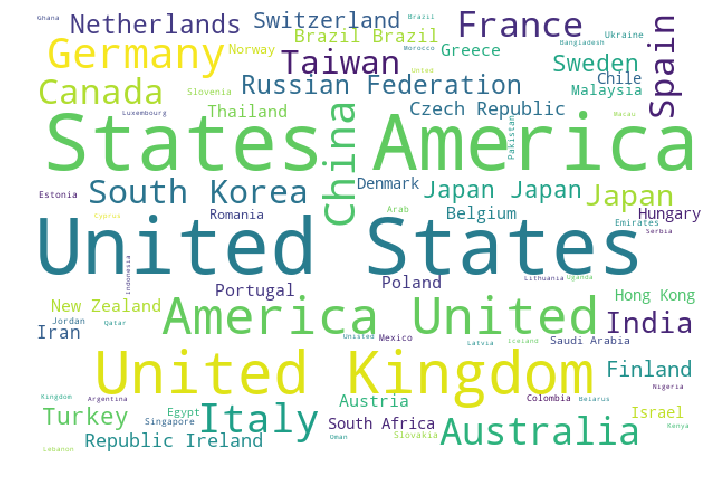

In [16]:
import matplotlib.pyplot as plt
x2016=my_data.country[my_data.year == 2016]
plt.subplots(figsize=(12,12))
from wordcloud import WordCloud
wordcloud=WordCloud(background_color='white',width=600,height=400).generate(" ".join(x2016))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Boxplots**

In [16]:
#Only data given to yaxis
x2015=my_data[my_data.year == 2015]
trace1=go.Box(y=x2015.total_score,name='Total score in university 2015',marker=dict(color='rgba(27, 255, 15, 1)'))
trace2=go.Box(y=x2015.research,name='Research in university 2015',marker=dict(color='rgba(255, 15, 15, 1)'))
data=[trace2,trace1]
iplot(data)

**Scatter Matrix Plots**

colormap types are available at -https://community.plot.ly/t/what-colorscales-are-available-in-plotly-and-which-are-the-default/2079

There can be diag be box,histogram.
There can be two colormap_type--->cat and seq.

In [17]:
import plotly.figure_factory as ff
import numpy as np
frame=my_data[my_data.year == 2015]
data2015=frame.loc[:,['research','international','total_score']]
data2015['index']=np.arange(1,len(data2015)+1)
fig=ff.create_scatterplotmatrix(data2015,diag='box',index='index',colormap='YlOrRd',colormap_type='cat',
                                height=1000,width=1000)
iplot(fig)

**Inset Plots**

In [18]:
trace1=go.Scatter(x=frame.world_rank,y=frame.teaching,name='teaching',marker=dict(color='rgba(87, 15, 255, 0.8)'))
trace2=go.Scatter(x=frame.world_rank,y=frame.income,xaxis='x2',yaxis='y2',name='Income',
                  marker=dict(color='rgba(10, 245, 14, 0.8)'))
data=[trace1,trace2]
layout=dict(xaxis2=dict(domain=[0.6,0.95],anchor='y2'),yaxis2=dict(domain=[0.6,0.95],anchor='x2'),
            title='Income and Teaching vs World Rank of Universities')
fig=dict(data=data,layout=layout)
iplot(fig)

In [19]:
trace1=go.Scatter(x=frame.world_rank,y=frame.research,name='research',mode='markers')
trace2=go.Scatter(x=frame.world_rank,y=frame.citations,name='citations',xaxis='x2',yaxis='y2')
trace3=go.Scatter(x=frame.world_rank,y=frame.income,name='income',xaxis='x3',yaxis='y3',mode='lines+markers')
trace4=go.Scatter(x=frame.world_rank,y=frame.total_score,name='total_score',xaxis='x4',yaxis='y4')
data=[trace1,trace2,trace3,trace4]
layout=dict(xaxis=dict(domain=[0,0.45]),yaxis=dict(domain=[0,0.45]),
            xaxis2=dict(domain=[0.55,1]),yaxis2=dict(domain=[0,0.45],anchor='x2'),
            xaxis3=dict(domain=[0,0.45],anchor='y3'),yaxis3=dict(domain=[0.55,1]),
            xaxis4=dict(domain=[0.55,1],anchor='y4'),yaxis4=dict(domain=[0.55,1],anchor='x4'),
            title='Research, citation, income and total score VS World Rank of Universities')
fig=dict(data=data,layout=layout)
iplot(fig)